In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import glob
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgb):
	r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
	gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
	return gray

In [3]:
files = glob.glob("/Volumes/Fred/Lava/*png")

## Look at an image

In [4]:
name = files[0]
im = Image.open(name)
im = im.resize((512,288))

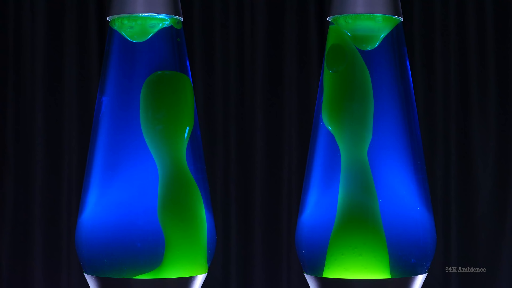

In [5]:
im

In [6]:
RGB = np.array(im)

In [7]:
np.shape(RGB)

(288, 512, 3)

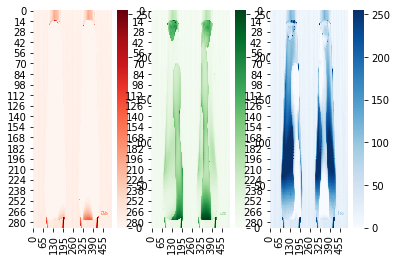

In [8]:
plt.subplot(1, 3, 1)
sn.heatmap(RGB[:,:,0],cmap='Reds')
plt.subplot(1, 3, 2)
sn.heatmap(RGB[:,:,1],cmap='Greens')
plt.subplot(1, 3, 3)
sn.heatmap(RGB[:,:,2],cmap='Blues')

## Process Data

In [10]:
files = glob.glob("/Volumes/Fred/Lava/*png")
print len(files)
LL = len(files)
LEN=5000

29729


In [11]:
x_train = np.zeros((LL,288,256,1))
y_train = np.zeros((LL,288,256,3))

In [ ]:
for i in range(LL):
    name = files[i]
    im = Image.open(name)
    im = im.resize((512,288))
    RGB = np.array(im)
    gray = rgb2gray(RGB)
    x_train[i] = np.reshape(np.array([gray[:,0:512/2]]),(288,256,1))/255.
    y_train[i] = np.array([RGB[:,0:512/2,:]])/255.

In [ ]:
x_test = np.zeros((LL,288,256,1))
y_test = np.zeros((LL,288,256,3))

In [113]:
for i in range(LL):
    name = files[i]
    im = Image.open(name)
    im = im.resize((512,288))
    RGB = np.array(im)
    gray = rgb2gray(RGB)
    x_test[i] = np.reshape(np.array([gray[:,512/2:]]),(288,256,1))/255.
    y_test[i] = np.array([RGB[:,512/2:,:]])/255.

In [64]:
x_train[0].shape

(288, 256, 1)

In [114]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 4, activation='relu',input_shape=(288, 256,1)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 8, activation='relu'),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 16, activation='relu'),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 16, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 8, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 3, activation='relu')
])

In [169]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 8, activation='relu',input_shape=(288, 256,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 16, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 16, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2DTranspose(kernel_size = (5,5), filters = 3, activation='relu')
])

In [170]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 286, 254, 8)       80        
_________________________________________________________________
batch_normalization_77 (Batc (None, 286, 254, 8)       32        
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 143, 127, 8)       0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 141, 125, 16)      1168      
_________________________________________________________________
batch_normalization_78 (Batc (None, 141, 125, 16)      64        
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 70, 62, 16)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 68, 60, 32)        4640      
__________

In [188]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=35)

Epoch 1/35
4340/4340 [==============================] - 1022s 235ms/step - loss: 0.0082
Epoch 2/35
4340/4340 [==============================] - 1180s 272ms/step - loss: 0.0034
Epoch 3/35
3680/4340 [========================>.....] - ETA: 13:42 - loss: 0.0027

In [179]:
res=model.predict(np.array([x_train[1000]]))[0]

In [180]:
res

array([[[0.        , 0.        , 0.100307  ],
        [0.        , 0.04708152, 0.08535273],
        [0.        , 0.03853888, 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.05748983, 0.        , 0.        ]],

       [[0.        , 0.        , 0.09202619],
        [0.        , 0.        , 0.02098689],
        [0.        , 0.        , 0.01192085],
        ...,
        [0.        , 0.05776881, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.01901809, 0.        , 0.        ]],

       [[0.        , 0.01803339, 0.10631611],
        [0.        , 0.05622146, 0.20842688],
        [0.        , 0.20578383, 0.11578789],
        ...,
        [0.        , 0.1577146 , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.03843319, 0.10550988, 0.        ]],

       ...,

       [[0.        , 0.20946303, 0.        ],
        [0.        , 0.        , 0.27343753],
        [0.16043219, 0

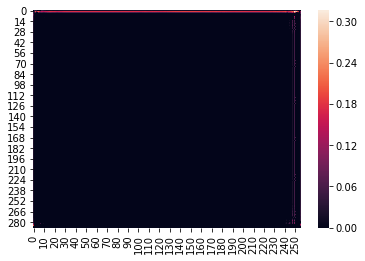

In [181]:
sn.heatmap(res[:,:,1])

In [185]:
res=res*255

In [186]:
resRI=res.astype('uint8')

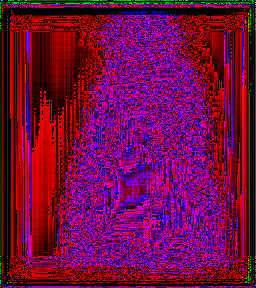

In [187]:
Image.fromarray(resRI)